In [ ]:
%pip install numpy matplotlib scikit-learn pandas tensorflow

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
from Data_Reader import MnistDataloader
from os.path import join

input_path = "input"
training_images_filepath = join(
    input_path, "train-images-idx3-ubyte/train-images.idx3-ubyte"
)
training_labels_filepath = join(
    input_path, "train-labels-idx1-ubyte/train-labels.idx1-ubyte"
)
test_images_filepath = join(input_path, "t10k-images-idx3-ubyte/t10k-images.idx3-ubyte")
test_labels_filepath = join(input_path, "t10k-labels-idx1-ubyte/t10k-labels.idx1-ubyte")

mnist_dataloader = MnistDataloader(
    training_images_filepath,
    training_labels_filepath,
    test_images_filepath,
    test_labels_filepath,
)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

x_train = np.array(x_train).reshape(-1, 28 * 28) / 255.0
x_test = np.array(x_test).reshape(-1, 28 * 28) / 255.0
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
train_data = pd.DataFrame(x_train, columns=[f'pixel{i}' for i in range(x_train.shape[1])])
train_data['label'] = y_train
X = x_train.reshape(-1, 28, 28, 1)
y = y_train

print("Shape of X after separating features:", X.shape)
print("Shape of y after separating labels:", y.shape)

Shape of X after separating features: (60000, 28, 28, 1)
Shape of y after separating labels: (60000,)


In [5]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (60000, 10)


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (48000, 28, 28, 1)


In [7]:
model = Sequential([
    Input(shape=(28, 28, 1)),  # This defines the input shape correctly
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9196 - loss: 0.2699 - val_accuracy: 0.9586 - val_loss: 0.1358
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9650 - loss: 0.1148 - val_accuracy: 0.9687 - val_loss: 0.1064
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9762 - loss: 0.0761 - val_accuracy: 0.9710 - val_loss: 0.1021
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9810 - loss: 0.0581 - val_accuracy: 0.9724 - val_loss: 0.0939
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9853 - loss: 0.0450 - val_accuracy: 0.9743 - val_loss: 0.0888
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9883 - loss: 0.0361 - val_accuracy: 0.9770 - val_loss: 0.0848
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9907 - loss: 0.0285 - val_accuracy: 0.9747 - val_loss: 0.0907
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9925 - loss: 0.0237 - 

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.9753 - loss: 0.1064
Validation Accuracy: 97.53%


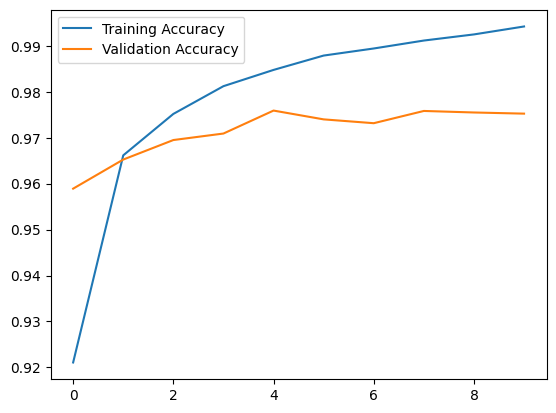

In [11]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [12]:
X_test = x_test.reshape(-1, 28, 28, 1)
print("Shape of X_test after reshaping:", X_test.shape)


Shape of X_test after reshaping: (10000, 28, 28, 1)


In [13]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step


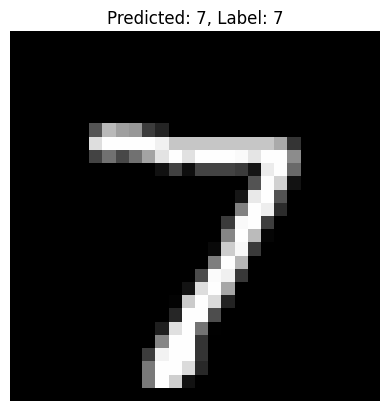

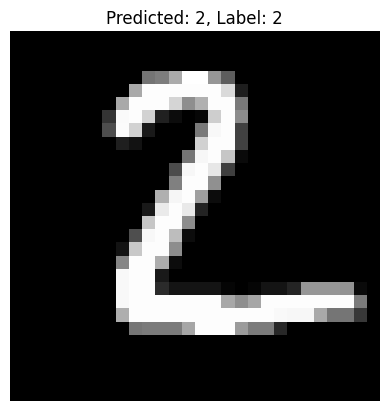

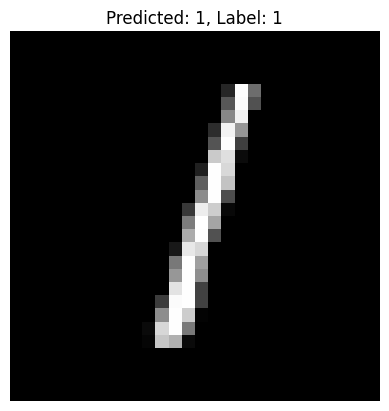

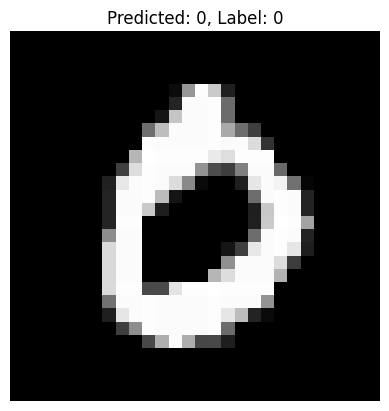

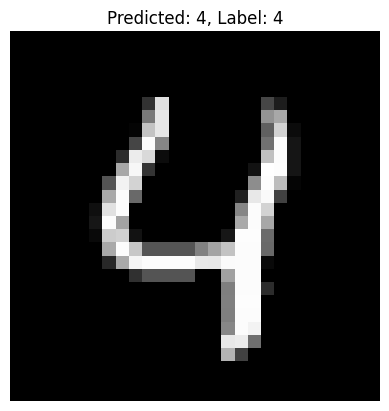

In [14]:
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, Label: {y_test[i]}")
    plt.axis('off')
    plt.show()

In [15]:
count = 0
for i in range(y_test.shape[0]):
    if (predicted_labels[i] != y_test[i]):
        count += 1
print(f"Number of wrong prediction: {count}")
print(f"Number of test sample: {y_test.shape[0]}")


Number of wrong prediction: 262
Number of test sample: 10000
